In [1]:
import cvxpy as cvx
import numpy as np

import matplotlib.pyplot as plt
from scipy import signal
import random
from scipy.stats import laplace_asymmetric
from sklearn.metrics import mean_absolute_error as mae

import sys
sys.path.append('/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/tests/fixtures/signal_decompositions/')
from utils import plot_decomp, plot_signal

from solardatatools.osd_signal_decompositions import tl1_l2d2p365 as osd_sd
from solardatatools.signal_decompositions import tl1_l2d2p365 as cvx_sd


np.random.seed(5) 
random.seed(5)

## `tl1_l2d2p365`

### Create input signal

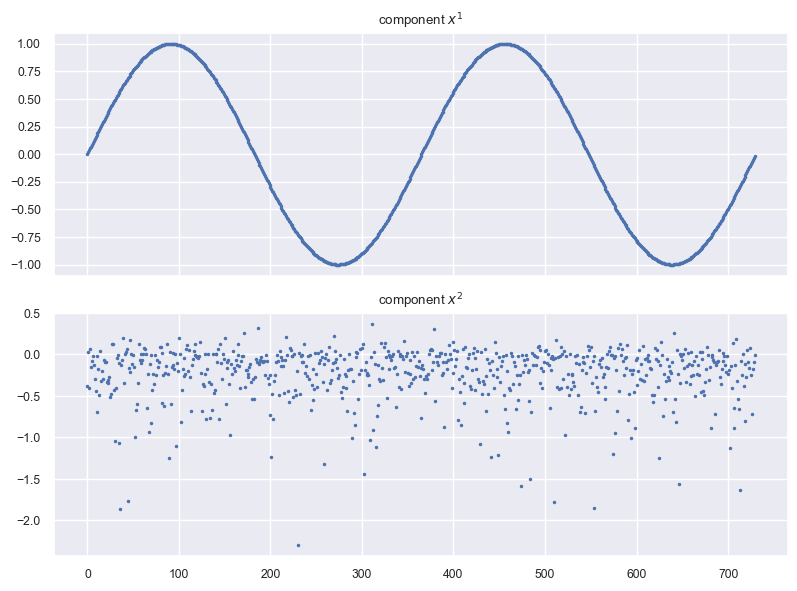

In [2]:
t = np.arange(365*2)

# seasonal periodic
signal1 = np.sin(2 * np.pi * t * 1 / (365.))
# asymmetric laplacian noise
kappa = 2 # k>0, k=1 is laplace
signal2 = 0.15 * laplace_asymmetric.rvs(kappa, size=len(signal1))

X_real = np.zeros((2, len(t)), dtype=float)
X_real[0] = signal1
X_real[1] = signal2

y = np.sum(X_real, axis=0)
plot_decomp(X_real)

Data with missing values 

In [3]:
indices_full = list(range(len(X_real[1])))
# select 20% randomly
indices_20perc = np.random.choice(indices_full, 200, replace=False)

X_real_80perc = X_real.copy()
y_80perc = y.copy()

X_real_80perc[0][indices_20perc] = np.nan
X_real_80perc[1][indices_20perc] = np.nan
y_80perc[indices_20perc] = np.nan

Data with missing chunks

In [4]:
indices_chunks_start = np.random.choice(indices_full, 5, replace=False)
X_real_chunks= X_real.copy()
y_chunks = y.copy()

for e in indices_chunks_start:
    for i in range(e, e+20):
        X_real_chunks[0][i] = np.nan
        X_real_chunks[1][i] = np.nan
        y_chunks[i] = np.nan

CVXPY objective       60.12255
OSD objective, scaled 60.12255
s_seas MAE (OSD,CVX)   3.82e-09


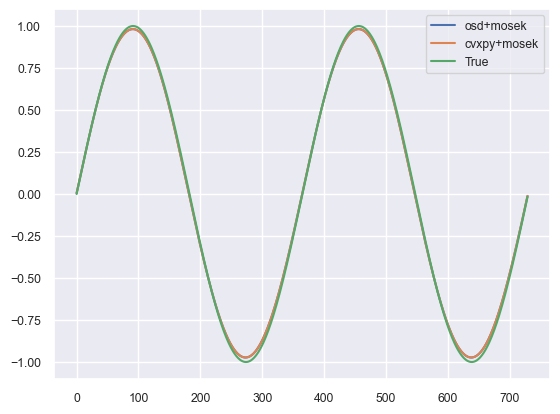

In [5]:
w_osd = {'tau': 0.8,
         'w2' : 5e5}
w_cvx = {'tau': 0.8,
         'c1' : 5e5}

osd_output = osd_sd(y, **w_osd, solver="MOSEK")
cvxpy_output = cvx_sd(y, **w_cvx, solver="MOSEK", comp_osd=osd_output) # for osd scaling

cvxpy_output = cvx_sd(y, **w_cvx, solver="MOSEK")

print(f's_seas MAE (OSD,CVX)   {mae(osd_output, cvxpy_output):.2e}')

f, (ax1) = plt.subplots(1, 1)
ax1.plot(osd_output, label="osd+mosek")
ax1.plot(cvxpy_output, label="cvxpy+mosek")
ax1.plot(X_real[0], label="True")
ax1.legend();

CVXPY objective       48.01403
OSD objective, scaled 48.01403
s_seas MAE (OSD,CVX)   2.43e-09


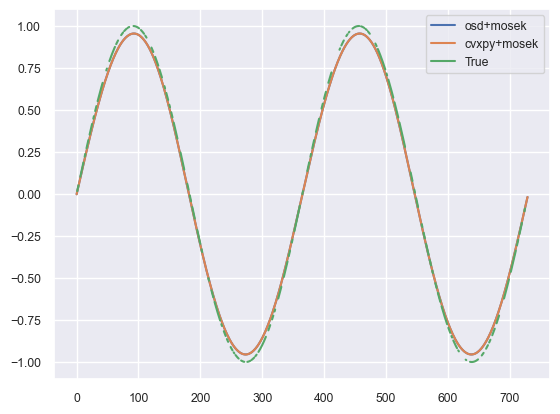

In [6]:
w_osd = {'tau': 0.8,
         'w2' : 5e5}
w_cvx = {'tau': 0.8,
         'c1' : 5e5}

osd_output = osd_sd(y_80perc, **w_osd, solver="MOSEK")
cvxpy_output = cvx_sd(y_80perc, **w_cvx, solver="MOSEK", comp_osd=osd_output) # for osd scaling

cvxpy_output = cvx_sd(y_80perc, **w_cvx, solver="MOSEK")

print(f's_seas MAE (OSD,CVX)   {mae(osd_output, cvxpy_output):.2e}')

f, (ax1) = plt.subplots(1, 1)
ax1.plot(osd_output, label="osd+mosek")
ax1.plot(cvxpy_output, label="cvxpy+mosek")
ax1.plot(X_real_80perc[0], label="True")
ax1.legend();

CVXPY objective       54.92530
OSD objective, scaled 54.92530
s_seas MAE (OSD,CVX)   1.65e-08


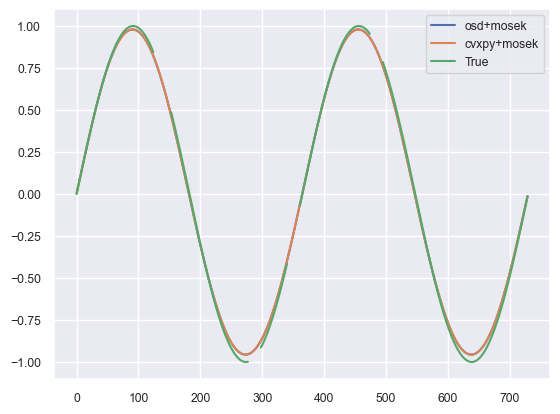

In [7]:
w_osd = {'tau': 0.8,
         'w2' : 5e5}
w_cvx = {'tau': 0.8,
         'c1' : 5e5}

osd_output = osd_sd(y_chunks, **w_osd, solver="MOSEK")
cvxpy_output = cvx_sd(y_chunks, **w_cvx, solver="MOSEK", comp_osd=osd_output) # for osd scaling

cvxpy_output = cvx_sd(y_chunks, **w_cvx, solver="MOSEK")

print(f's_seas MAE (OSD,CVX)   {mae(osd_output, cvxpy_output):.2e}')

f, (ax1) = plt.subplots(1, 1)
ax1.plot(osd_output, label="osd+mosek")
ax1.plot(cvxpy_output, label="cvxpy+mosek")
ax1.plot(X_real_chunks[0], label="True")
ax1.legend();